In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [4]:
diabetes=load_diabetes()
x=diabetes.data
y=diabetes.target
data=pd.DataFrame(x,columns=diabetes.feature_names)
data['target']=y

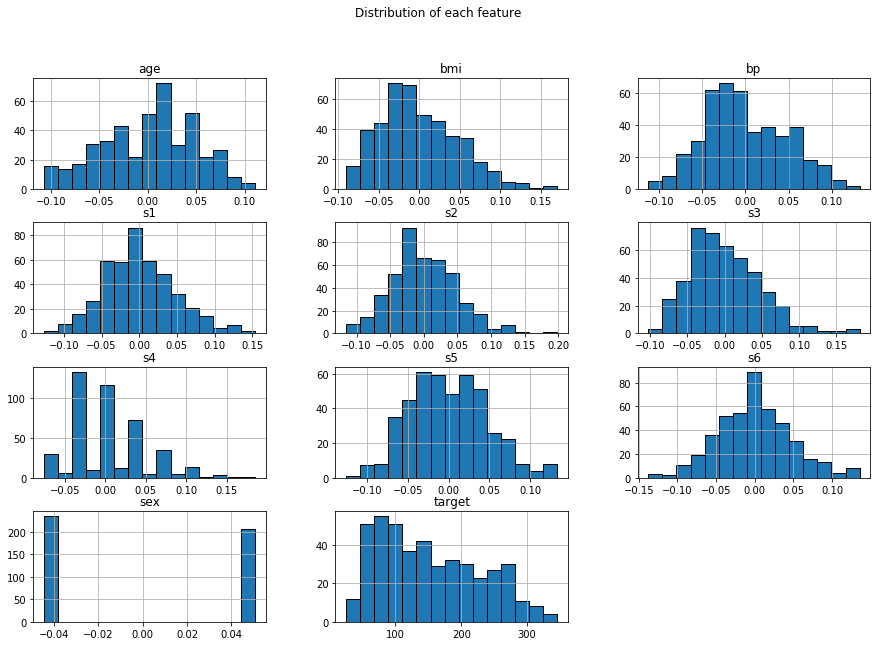

In [6]:
data.hist(bins=15,figsize=(15,10),edgecolor='black')
plt.suptitle("Distribution of each feature")
plt.show()

In [7]:
num_attributes=data.select_dtypes(include=np.number).shape[1]
cat_attributes=data.select_dtypes(exclude=np.number).shape[1]
nu_classes=len(np.unique(y))
print(f"Number of numerical attributes:{num_attributes}")
print(f"Number of categorical attributes:{cat_attributes}")
print(f"Number of classes:{nu_classes}")


Number of numerical attributes:11
Number of categorical attributes:0
Number of classes:214


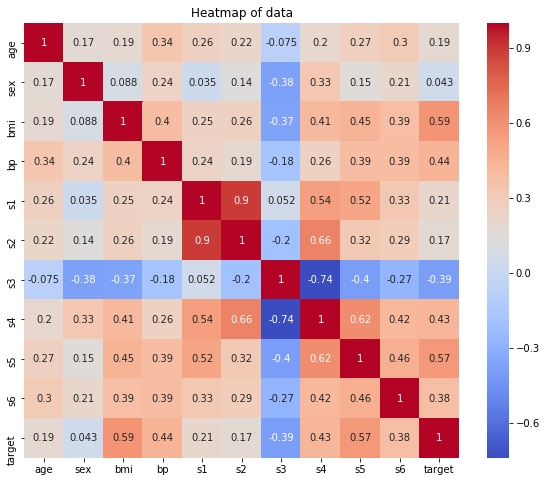

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm",square=True)
plt.title("Heatmap of data")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto

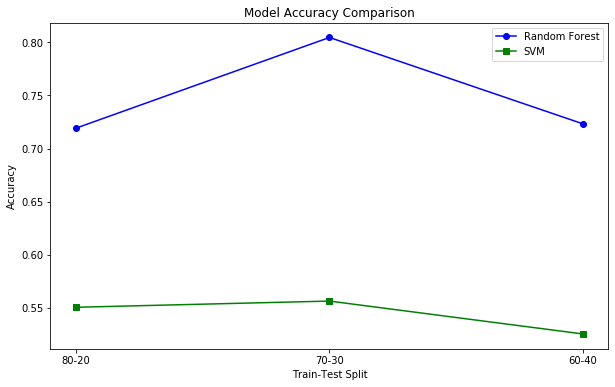

In [12]:
X = diabetes.data
y = diabetes.target > 150  

rf_accuracies = []
svm_accuracies = []
splits = [(0.8, 0.2), (0.7, 0.3), (0.6, 0.4)]

for train_size, test_size in splits:

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=test_size, random_state=42)
 
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    rf_accuracies.append(accuracy_score(y_test, rf_pred))
    
    svm = SVC(random_state=42)
    svm.fit(X_train, y_train)
    svm_pred = svm.predict(X_test)
    svm_accuracies.append(accuracy_score(y_test, svm_pred))
mean_rf_accuracy = np.mean(rf_accuracies)
mean_svm_accuracy = np.mean(svm_accuracies)
splits_labels = ['80-20', '70-30', '60-40']
plt.figure(figsize=(10, 6))
plt.plot(splits_labels, rf_accuracies, marker='o', label="Random Forest", color='blue')
plt.plot(splits_labels, svm_accuracies, marker='s', label="SVM", color='green')
plt.title("Model Accuracy Comparison")
plt.xlabel("Train-Test Split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
